<a href="https://colab.research.google.com/github/adithi20/Arrays/blob/main/ML_project(Image_classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries (if not pre-installed)
!pip install matplotlib


In [2]:
import tensorflow as tf

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 11s 0us/step


In [3]:
# Data preprocessing
train_images = train_images / 255.0
test_images = test_images / 255.0


In [4]:
# Build your model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [5]:
# Compile your model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
# Train your model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.4538 - accuracy: 0.4783 - val_loss: 1.2054 - val_accuracy: 0.5714
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1082 - accuracy: 0.6161 - val_loss: 1.0339 - val_accuracy: 0.6326
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9827 - accuracy: 0.6588 - val_loss: 0.9638 - val_accuracy: 0.6649
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8957 - accuracy: 0.6869 - val_loss: 0.9734 - val_accuracy: 0.6616
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8374 - accuracy: 0.7091 - val_loss: 0.9059 - val_accuracy: 0.6874
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7799 - accuracy: 0.7283 - val_loss: 0.9532 - val_accuracy: 0.6771
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7293 - accuracy: 0.7440 - val_loss: 0.8761 -

In [7]:
# Evaluate your model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


313/313 [==============================] - 4s 13ms/step - loss: 0.9239 - accuracy: 0.6954
Test accuracy: 0.6953999996185303


1563/1563 [==============================] - 19s 12ms/step


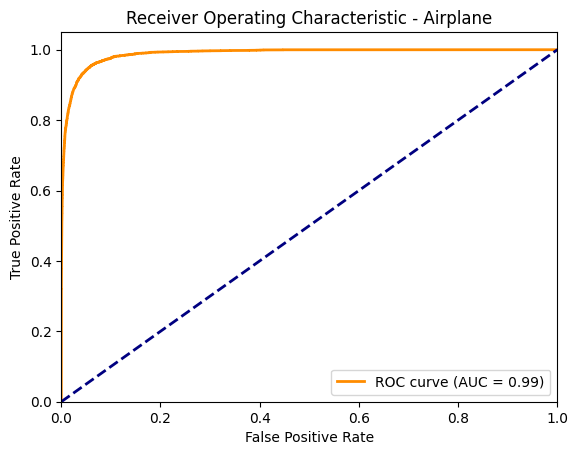

In [13]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Load test set (if not loaded already)
(test_images, test_labels), _ = tf.keras.datasets.cifar10.load_data()
test_images = test_images / 255.0  # Normalize pixel values

# Choose a specific class (e.g., "Airplane") for ROC curve analysis
class_index = class_names.index("Airplane")

# Binarize the labels for the chosen class
y_true_bin = label_binarize(test_labels, classes=[class_index])
y_pred_probs_bin = model.predict(test_images)[:, class_index]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_true_bin, y_pred_probs_bin)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Airplane')
plt.legend(loc="lower right")
plt.show()